# Drzewa regresyjne
Prognozowanie z wykorzystaniem drzew oraz powtórzenie klasyfikatorów.
## Przykład 1 - Drzewa klasyfikacyjne przykład 
Przeanalizuj kod, zmień parametr max_depth na 2 i 3 - jak wpływa to na drzewo?

In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics

mower_df = pd.read_csv('RidingMowers.csv')
classTree = DecisionTreeClassifier(random_state=1, max_depth=3)
clf = classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])
#print("Classes: {}".format(', '.join(classTree.classes_)))
tree.plot_tree(clf, feature_names=mower_df.columns[:2], 
                 class_names=classTree.classes_,
              filled=True)


NameError: name 'DecisionTreeClassifier' is not defined

# Drzwa klasyfikacyjne - zadanie powtórzeniowe
Universal Bank jest stosunkowo młodym bankiem, który dynamicznie rozwija się pod względem ogólnego pozyskiwania klientów. Większość tych klientów to klienci zobowiązani o różnej skali relacji z bankiem. Baza klientów aktywów jest dość mała, a bank jest zainteresowany szybkim powiększaniem tej bazy, aby zwiększyć liczbę transakcji kredytowych. W szczególności chce zbadać sposoby przekształcenia swoich klientów z depozytami w klientów korzystających z pożyczek osobistych.

Kampania, którą bank prowadził dla klientów z zobowiązaniami, wykazała współczynnik konwersji na poziomie ponad 9% sukcesu. Zachęciło to dział marketingu detalicznego do mądrzejszego opracowywania rozwiązań kampanie z lepiej ukierunkowanym marketingiem. Celem naszej analizy jest modelowanie zachowań klientów z poprzedniej kampanii, aby sprawdzić, jaka kombinacja czynników zwiększa prawdopodobieństwo, że klient zaakceptuje pożyczkę osobistą. Posłuży to jako podstawa do zaprojektowania nowej kampanii.

Spróbujmy zbudować klasyfikator oparty o drzewa CRT


[[2713    0]
 [   0  287]]
[[1790   17]
 [  25  168]]
Dokładność dla każdeog z foldów:  ['0.988', '0.973', '0.993', '0.982', '0.993']


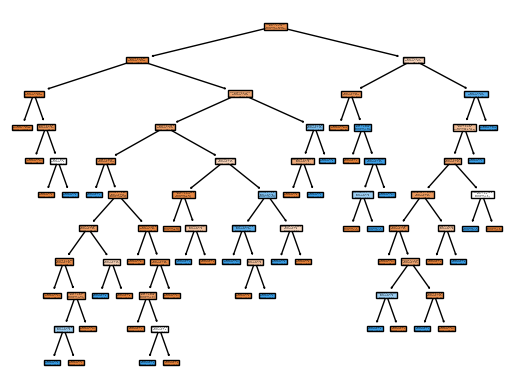

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

bank_df = pd.read_csv('UniversalBank.csv')
# Usuń ze zbioru danych kolumny ID i ZIP Code
# Zbuduj zbiór uczący i testowy przy założeniu, że przewidujemy zachowanie kolumny PersonalLoan
# Podziel próbkę w stosunku 60% zbiór uczący 40% testowy losowo train_test_split


# Budowa drzewa wyczeerpującego
fullClassTree = DecisionTreeClassifier(random_state=1)
fit = fullClassTree.fit(train_X, train_y)

tree.plot_tree(fit, feature_names=train_X.columns, filled=True)

# Macież pomyłek dla próbki uczącej
print(metrics.confusion_matrix(train_y, fullClassTree.predict(train_X)))
# Macież pomyłek dla próbki testowej

# Oceń dokładność klasyfikacji w znany sposób?

# Weryfikacja z wykorzystniem kross-walidacji
scores = cross_val_score(fullClassTree, train_X, train_y, cv=5)
print('Dokładność dla każdeog z foldów: ', [f'{acc:.3f}' for acc in scores])


# Unikanie przetrenowania
Wykorzystując kod powyżej, zduduj drzewo odporne na przeuczenie. W tym celu w drzewach optymalizuje się zwykle następujące parametry:

`max_depth`
Maksymalna ilość kolejnych pytań (węzłów), które drzewo może zadawać. Więcej pytań oznacza, że algorytm może lepiej rozróżniać przypadki w zestawie treningowym, osiągając lepszą dokładność. Ale również naraża to na ryzyko przeuczenia zestawu treningowego.

`min_samples_split`
Minimalna ilość próbek, które są wymagane w węźle, aby wywołać nowy podział. Jeśli ustawisz to na 6, węzeł z tylko 5 obserwacjami nie zostanie podzielony dalej. Zmniejszenie min_samples_split również pozwoli ci osiągnąć lepszą dokładność na teście treningowym, co może skutkować przeuczeniem.

`min_samples_leaf`
Minimalna ilość obserwacji, które muszą znajdować się w liściu. Jest to bardzo ważny parametr. Im bliżej 0, tym większe ryzyko przeuczenia — drzewo będzie rosło dopóki nie zada wystarczająco dużo pytań, aby traktować każdą obserwację osobno.

Zbuduj drzewo od `max_depth` 30, `min_sample_split=20`, `min_sample_leaf=7` wykorzystując kod powyżej jak zmieniło się drzewo i jak zmieniła się trafność?


# Automtyzacja znajdowania najlepszego wyniku (Fine_tuning parameters
Do znalezienia najlepszej grupy parametrów będziemy wykorzystywali GridSearch

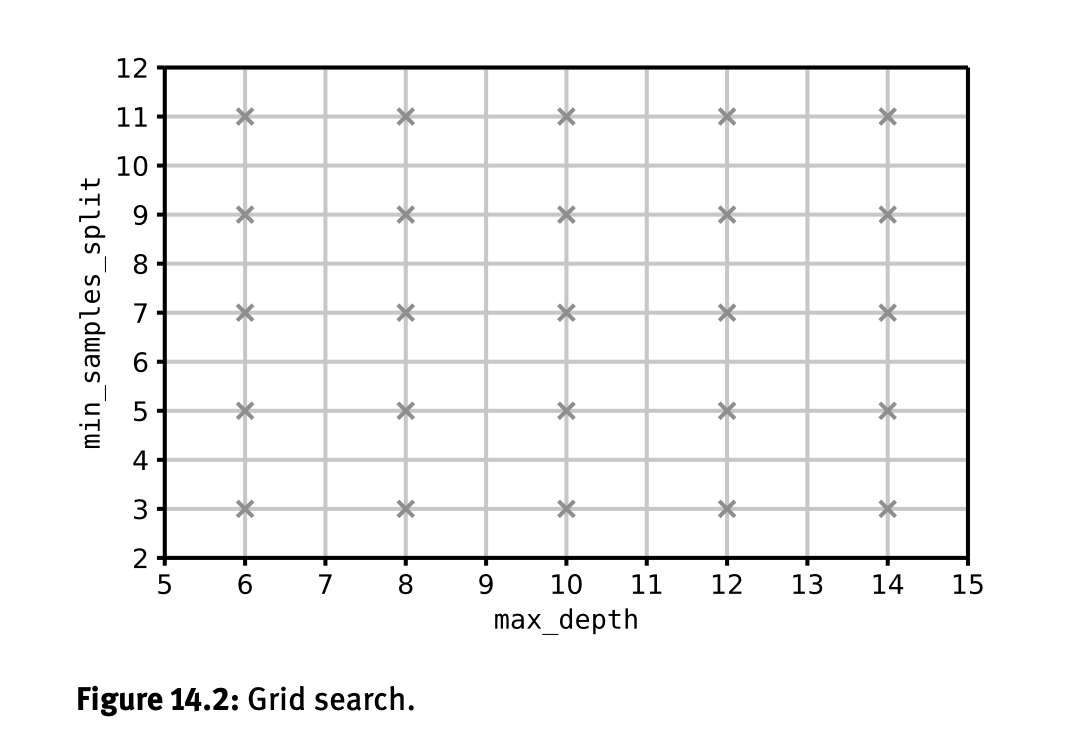

oraz random serach

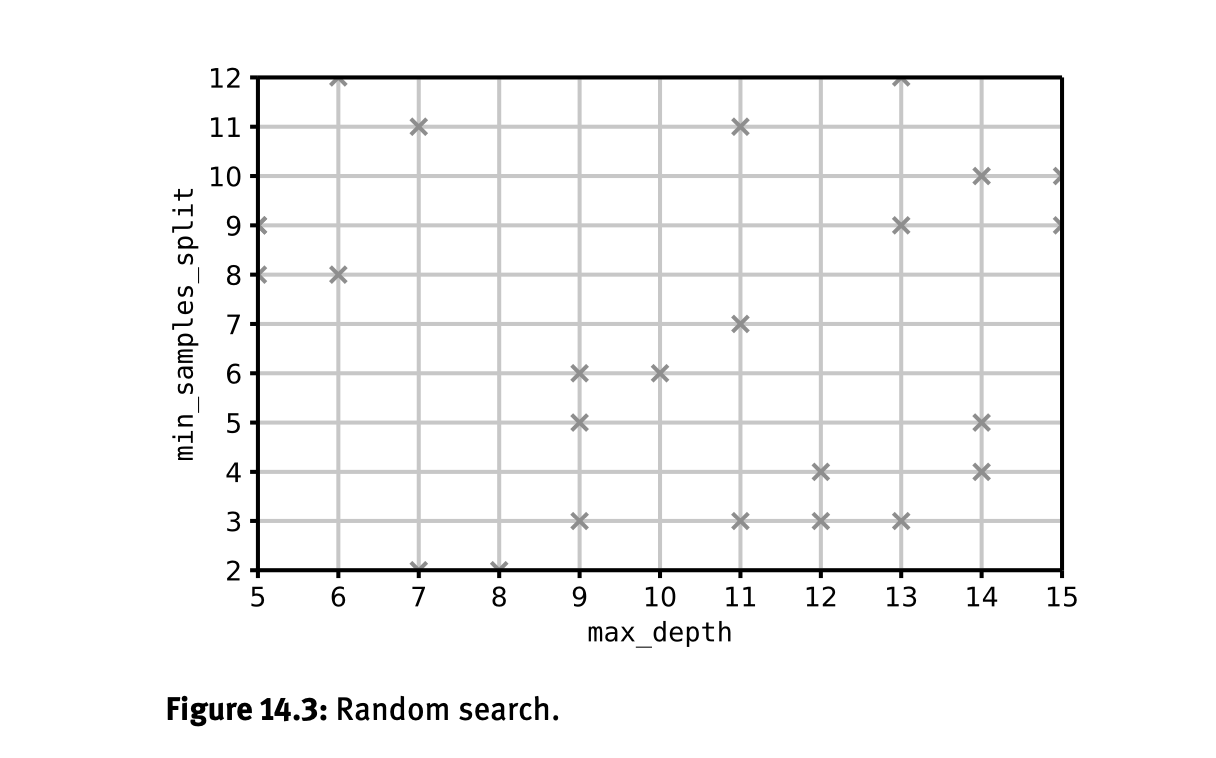


Parametry GridSearch

`n_jobs` (domyślnie=1)
Ten parametr określa liczbę procesorów, które Python przydzieli do uruchomienia modelu. Każdy procesor będzie pracował równolegle nad innym drzewem. Możesz ustawić `n_jobs=-1`, aby przydzielić wszystkie swoje procesory – co drastycznie zmniejszy czas obliczeń!

`cv` (domyślnie=3)
To jest liczba podziałów, które chcemy utworzyć (czynnik k z walidacji krzyżowej k-krotnej). Ustaw ją jak poprzednio.

`verbose` (domyślnie=0)
Im wyższa wartość parametru, tym więcej informacji funkcja wydrukuje podczas jej uruchamiania.

`n_iter` (domyślnie=10)
To jest liczba zestawów parametrów, które chcesz przetestować. Im większa liczba, tym lepiej, ponieważ przetestujesz więcej różnych zestawów parametrów. Ale będzie to miało miejsce kosztem dłuższego czasu obliczeń. Ustaw 100 iteracji

Wyznacz i narysuj drzewo z najlepszym wyborem RandomSearch. Przerób kod na GridSearch



In [58]:
max_depth = [10,20,30,40]
min_samples_split = [20, 40, 60, 80, 100]
min_samples_leaf = [10,15,20,25]
param_dist = {'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}


from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier()
#tree_cv = RandomizedSearchCV(tree, param_dist, n_jobs=, cv=, verbose=1, n_iter=100)
tree_cv.fit(train_X,train_y)

print('Najlepsze parametry drzewa',tree_cv.best_params_)
#wydrukuj najlepsze drzewo




Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Regression Tree Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 10}
